In [66]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('credit_card_fraud_10k.csv')
print(data)

      transaction_id  amount  transaction_hour merchant_category  \
0                  1   84.47                22       Electronics   
1                  2  541.82                 3            Travel   
2                  3  237.01                17           Grocery   
3                  4  164.33                 4           Grocery   
4                  5   30.53                15              Food   
...              ...     ...               ...               ...   
9995            9996  350.91                22              Food   
9996            9997  410.04                 5          Clothing   
9997            9998  527.75                21       Electronics   
9998            9999   91.20                 2       Electronics   
9999           10000   44.06                 2          Clothing   

      foreign_transaction  location_mismatch  device_trust_score  \
0                       0                  0                  66   
1                       1                  0   

In [4]:
data.shape

(10000, 10)

In [5]:
data.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [8]:
data .describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [9]:
data.isnull().any()

transaction_id         False
amount                 False
transaction_hour       False
merchant_category      False
foreign_transaction    False
location_mismatch      False
device_trust_score     False
velocity_last_24h      False
cardholder_age         False
is_fraud               False
dtype: bool

In [10]:
data.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [11]:
x='is_fraud'

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

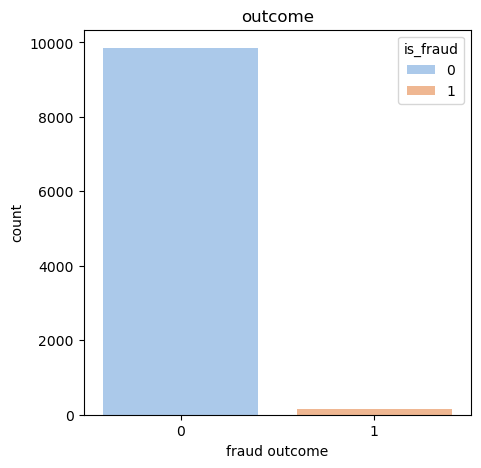

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x=x,palette='pastel',data=data,hue='is_fraud')
plt.title('outcome')
plt.xlabel('fraud outcome')
plt.ylabel('count')
plt.show()

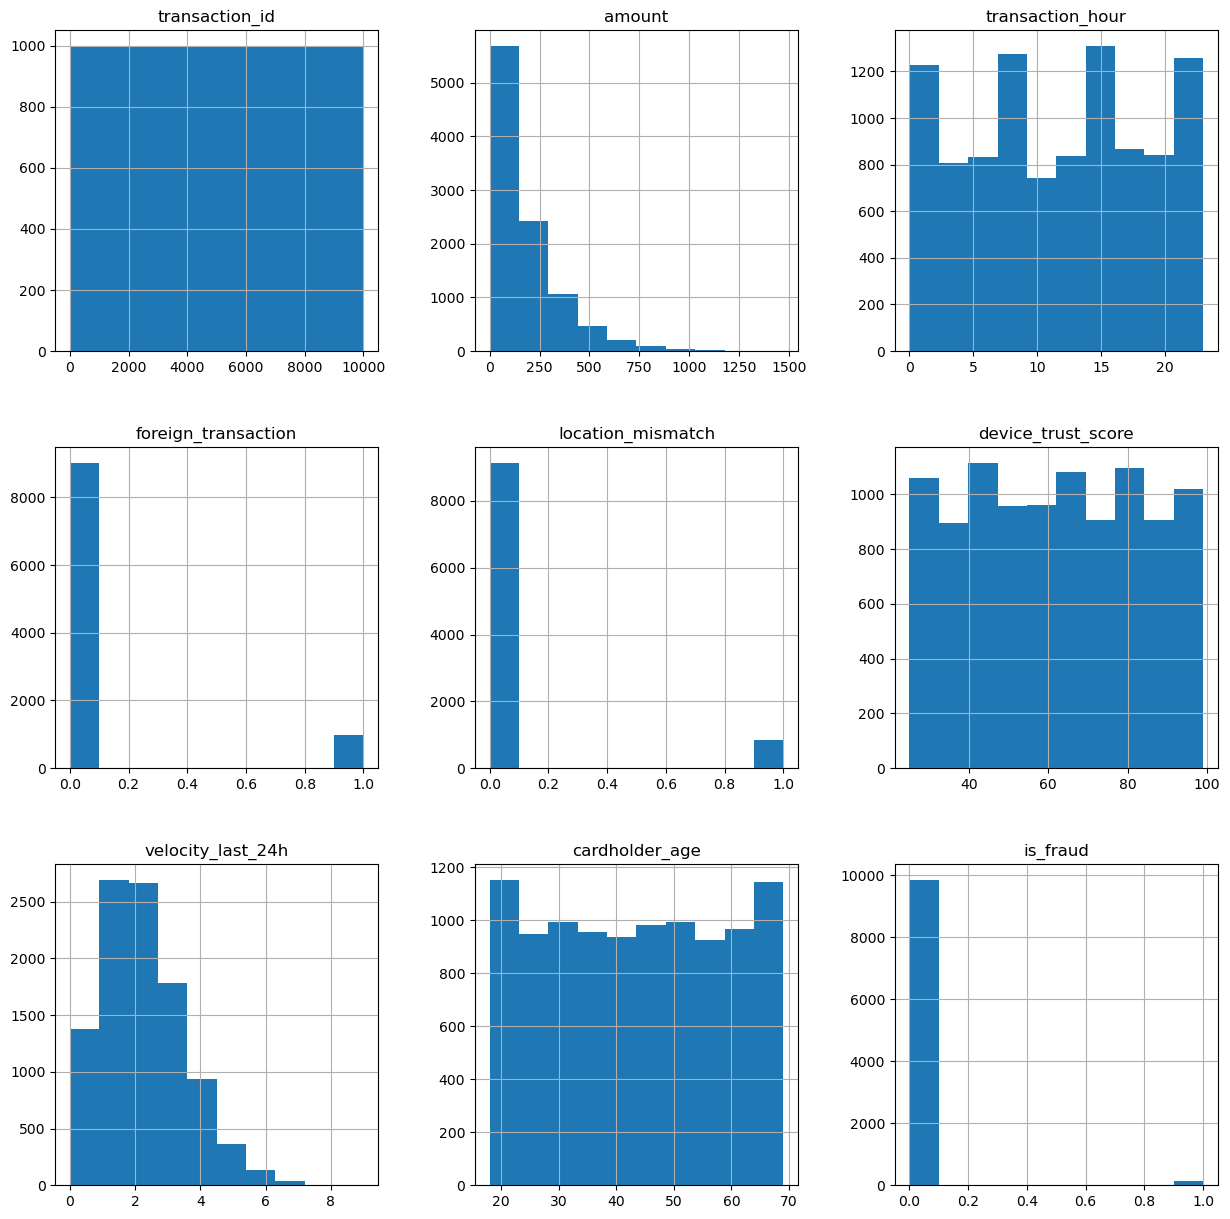

In [26]:
data_c=data.copy(deep=True) #used for finding each every column
p = data_c.hist(figsize = (15,15))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [63]:
X=data.drop(columns='is_fraud')
y=data['is_fraud']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.5,random_state=42)
from sklearn.compose import ColumnTransformer
numerical=X_train.drop(columns='merchant_category').columns
categorical=['merchant_category']
preprocessing=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical),
        ('cat',OneHotEncoder(),categorical)
    ],
    remainder='passthrough'
)
Xtrain_scaled=preprocessing.fit_transform(X_train)
Xtest_scaled=preprocessing.transform(X_test)

In [65]:
Xtrain_scaled.shape

(5000, 13)